# **Project 3**

### Stavrinos Nikolaos 2631

### Konstantinidis Konstantinos 2546

## Importing the libraries and data

In [ ]:
!pip install mpl_finance
!pip install mplfinance
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
# Importing the training set
df = pd.read_csv('sp500.csv',delimiter= " ")
df.rename(columns={"Index": "Date"},inplace=True)
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.set_index(['Datetime'])
ohlc = df.loc[:, ['Date', 'GSPC.Open','GSPC.High','GSPC.Low','GSPC.Close']]
del df['Date']

df.head()

,GSPC.Open,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Volume,GSPC.Adjusted
Datetime,,,,,,
1970-01-02,92.059998,93.540001,91.790001,93.000000,8050000.0,93.000000
1970-01-05,93.000000,94.250000,92.529999,93.459999,11490000.0,93.459999
1970-01-06,93.459999,93.809998,92.129997,92.820000,11460000.0,92.820000
1970-01-07,92.820000,93.379997,91.930000,92.629997,10010000.0,92.629997
1970-01-08,92.629997,93.470001,91.989998,92.680000,10670000.0,92.680000


## Summary of the dataset

In [ ]:
df.describe()

,GSPC.Open,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Volume,GSPC.Adjusted
count,11622.000000,11622.000000,11622.000000,11622.000000,1.162200e+04,11622.000000
mean,669.643958,673.918032,665.114892,669.794321,1.143241e+09,669.794321
std,576.881964,580.180753,573.278861,576.942179,1.635551e+09,576.942179
min,62.279999,63.230000,60.959999,62.279999,6.650000e+06,62.279999
25%,122.302502,123.300000,121.235000,122.302502,4.831250e+07,122.302502
50%,434.069992,435.559998,432.500000,434.279999,2.363650e+08,434.279999
75%,1177.814972,1184.852508,1169.257507,1177.965027,1.560700e+09,1177.965027
max,2130.360107,2134.719971,2126.060059,2130.820068,1.145623e+10,2130.820068


## Informations about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11622 entries, 1970-01-02 to 2016-01-25
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GSPC.Open      11622 non-null  float64
 1   GSPC.High      11622 non-null  float64
 2   GSPC.Low       11622 non-null  float64
 3   GSPC.Close     11622 non-null  float64
 4   GSPC.Volume    11622 non-null  float64
 5   GSPC.Adjusted  11622 non-null  float64
dtypes: float64(6)
memory usage: 635.6 KB


## Plot of the GSPC.Close 

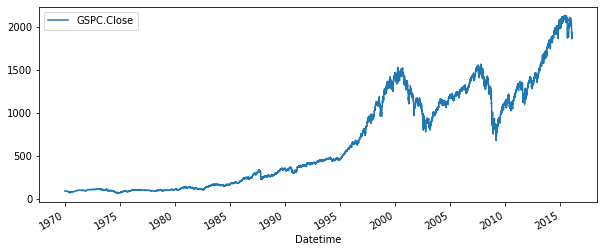

In [ ]:
df.plot(y='GSPC.Close',legend=True,figsize=(10,4))
plt.ioff()

## Moving average of the stocks for 10,50 days for 5 last months

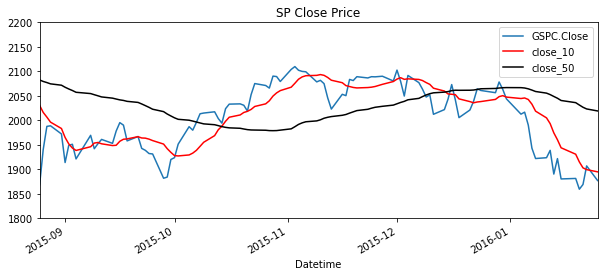

In [ ]:
df['close_10']=df['GSPC.Close'].rolling(10).mean()
df['close_50']=df['GSPC.Close'].rolling(50).mean()

ax=df.plot(y='GSPC.Close',xlim=['2015-08-25','2016-01-25'],ylim=[1800,2200],title='SP Close Price',figsize=(10,4))
df.plot(y='close_10',color='red',ax=ax)
df.plot(y='close_50',color='k',ax=ax)
plt.ioff()

## The daily return of the stock for the last 5 months

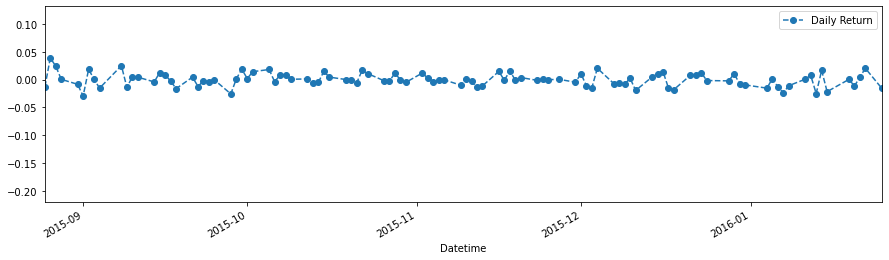

In [ ]:
df['Daily Return']=df['GSPC.Close'].pct_change()
df['Daily Return'].plot(figsize=(15,4),xlim=['2015-08-25','2016-01-25'],legend=True,linestyle='--',marker='o')
plt.ioff()

## Overall look at the average daily return using a histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


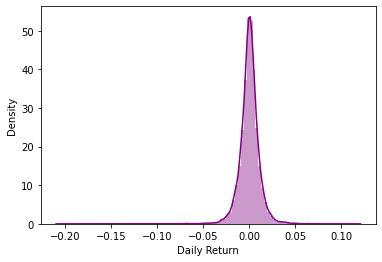

In [ ]:
sns.distplot(df['Daily Return'].dropna(),bins=100,color='purple')
plt.ioff()

##  Daily Candlestick Chart for the last 5 months

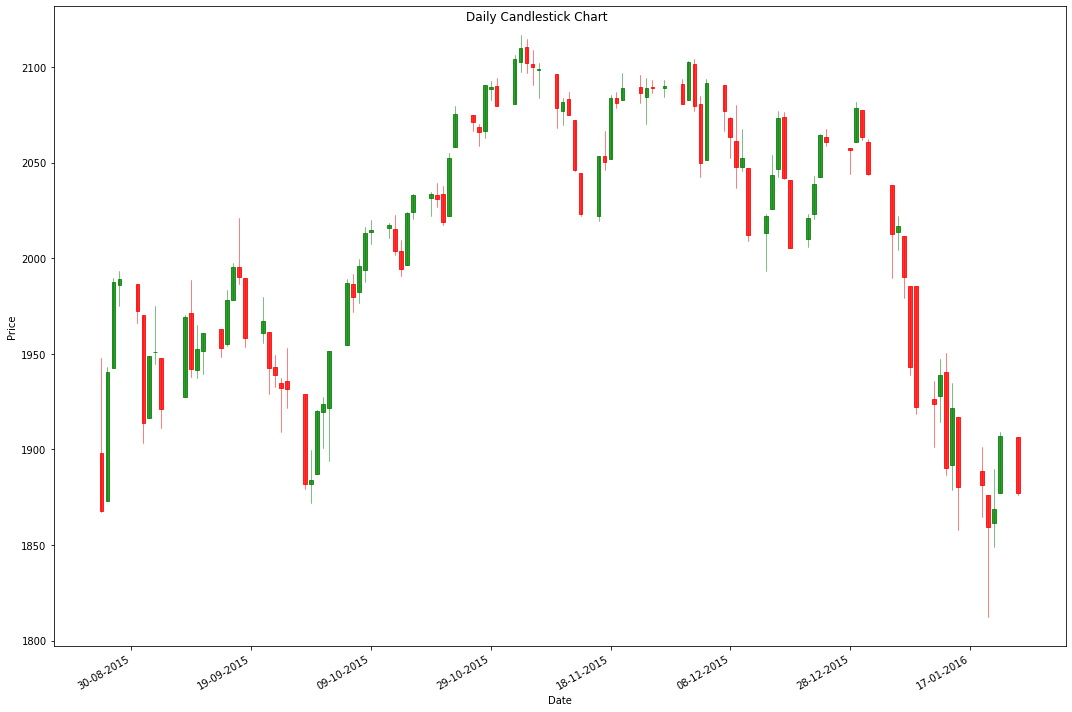

In [ ]:
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
_,ohlc=train_test_split(ohlc,train_size=0.991,shuffle=False)
ohlc = ohlc.astype(float)

fig, ax = plt.subplots(figsize=(15,10))

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

plt.show()


## Daily Candlestick Chart with stock moving average of 10 days for the last 5 months

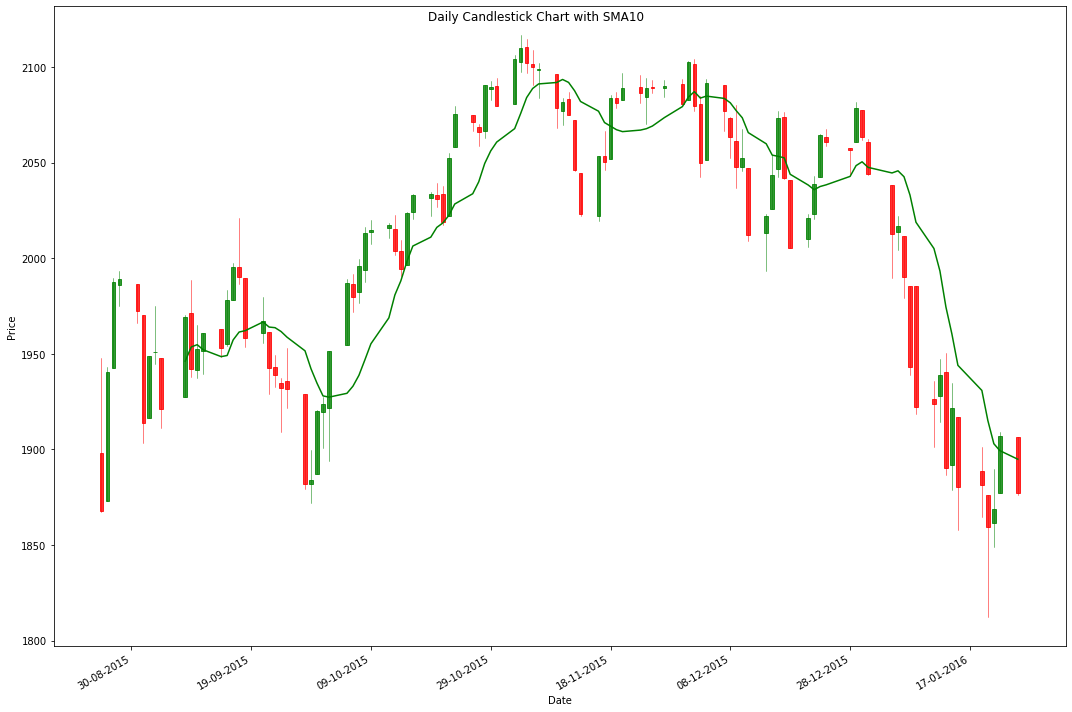

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ohlc['SMA10'] = ohlc['GSPC.Close'].rolling(10).mean()
ax.plot(ohlc['Date'], ohlc['SMA10'], color='green', label='SMA10')

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart with SMA10')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()


## OHLC chart with lines for moving average and  the volume for the last 5 months

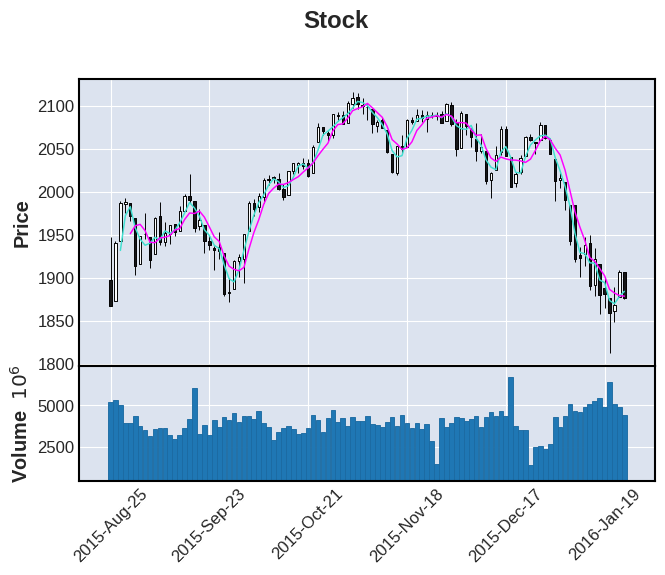

In [ ]:
df_copy=df.copy()
df_copy.rename(columns={"GSPC.Close": "Close","GSPC.Open": "Open","GSPC.High": "High","GSPC.Low": "Low","GSPC.Volume": "Volume"},inplace=True)
_,df_copy=train_test_split(df_copy,train_size=0.991,shuffle=False)

mpf.plot(df_copy,type='candle',mav=(3, 5),volume=True, title='Stock')


# Stock Prediction with NN

## Importing the Keras libraries 


In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

## We keep only the Close variable to use for our predictions

In [ ]:
data = df.filter(['GSPC.Close'])
# Convert the dataframe to a numpy array
training_set = data.values

training_set_len = int(np.ceil( len(df) * .99 ))
training_set_len

11506

## Scalling the training set between (0,1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Predicting the close price of the stock with 60 days timestemp


In [ ]:
train_data = training_set_scaled[0:int(training_set_len), :]

X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping the training dataset

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Builting the NN Model

In [ ]:
model = Sequential()

# Adding the first LSTM layer
model.add(LSTM(units = 100,return_sequences = True,input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer 
model.add(LSTM(units = 100, return_sequences = True))

# Adding a third LSTM layer
model.add(LSTM(units = 100, return_sequences = True))

# Adding a fourth LSTM layer
model.add(LSTM(units = 100))

# Adding the output layer
model.add(Dense(units = 1))

## Summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 282,101
Trainable params: 282,101
Non-trainable params: 0
_________________________________________________________________


## Setting the Adam optimizer 

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001 , beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

## Compiling the model with mse for loss 

In [ ]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

## Fiting the model

In [ ]:
start=time.time()
# Fitting the model to the Training set
history=model.fit(X_train, y_train, epochs = 15, batch_size = 32)
end=time.time()


Epoch 1/15
358/358 [==============================] - 117s 261ms/step - loss: 0.0023
Epoch 2/15
358/358 [==============================] - 84s 235ms/step - loss: 1.8442e-04
Epoch 3/15
358/358 [==============================] - 85s 238ms/step - loss: 2.0281e-04
Epoch 4/15
358/358 [==============================] - 76s 211ms/step - loss: 1.6886e-04
Epoch 5/15
358/358 [==============================] - 72s 202ms/step - loss: 1.5261e-04
Epoch 6/15
358/358 [==============================] - 73s 203ms/step - loss: 1.4161e-04
Epoch 7/15
358/358 [==============================] - 73s 204ms/step - loss: 1.2753e-04
Epoch 8/15
358/358 [==============================] - 72s 202ms/step - loss: 1.2536e-04
Epoch 9/15
358/358 [==============================] - 72s 202ms/step - loss: 1.1142e-04
Epoch 10/15
358/358 [==============================] - 73s 204ms/step - loss: 8.8695e-05
Epoch 11/15
358/358 [==============================] - 72s 202ms/step - loss: 1.0640e-04
Epoch 12/15
358/358 [============

## The time that took to train the model

In [ ]:
print("It took '{}' seconds to to train the model".format(np.round(end-start,4)))

It took '1160.0446' seconds to to train the model


## Plot of the loss through out the training

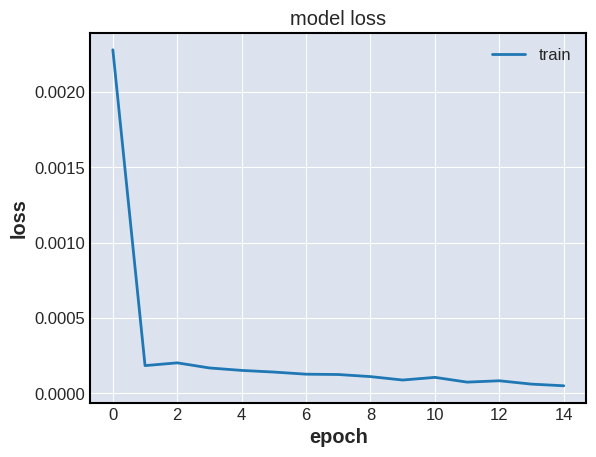

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## The root mean squared error of the model

In [ ]:
test_data = training_set_scaled[training_set_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = training_set[training_set_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions_trans = model.predict(x_test)


predictions = sc.inverse_transform(predictions_trans)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("The RMSE is : ",rmse)

The RMSE is :  33.47970570855229


## Plot of predictions and the actual close stock price of the last 5 months 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


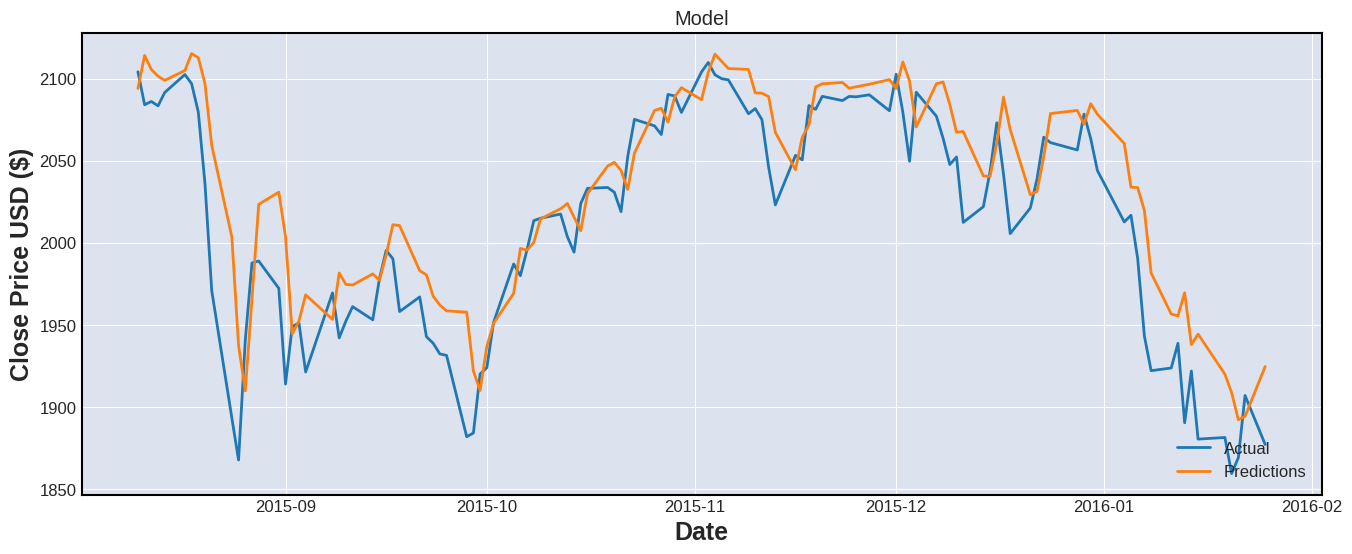

In [ ]:
# Plot the data
train = data[:training_set_len]
test = data[training_set_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test[['GSPC.Close', 'Predictions']])
plt.legend([ 'Actual', 'Predictions'], loc='lower right')
plt.show()

## Side to side predictions and actual close stocke price 

In [ ]:
test

,GSPC.Close,Predictions
Datetime,,
2015-08-10,2104.179932,2093.942383
2015-08-11,2084.070068,2114.116211
2015-08-12,2086.050049,2105.562256
2015-08-13,2083.389893,2101.448975
2015-08-14,2091.540039,2098.906006
...,...,...
2016-01-19,1881.329956,1919.871094
2016-01-20,1859.329956,1908.669556
2016-01-21,1868.989990,1892.172363


## Signal whether to buy, sell or halt

In [ ]:
def signals(data,left,right):
    global train
    l=[]
    for i in range(0,len(data)):
      if(data[i]- (train['GSPC.Close'].tail(max(0,30-i)).sum()+test.iloc[max(0,i-30):i,0].values.sum())/30<left):
        l.append(0)
      elif(data[i]- (train['GSPC.Close'].tail(max(0,30-i)).sum()+test.iloc[max(0,i-30):i,0].values.sum())/30>right):
        l.append(1)
      else:
        l.append(2)
    return l

sc = MinMaxScaler(feature_range = (0, 1))
datafr=pd.DataFrame(signals(test.iloc[:,1],-20,20)).value_counts(sort=False)
print(datafr)

sc = MinMaxScaler(feature_range = (0, 1))
datafr_test=pd.DataFrame(signals(y_test,-20,20)).value_counts(sort=False)

0    39
1    42
2    35
dtype: int64


## Labeling and comparing results

In [ ]:

datafr_test=pd.DataFrame(datafr_test)
datafr_test.index = ['s', 'b', 'h']
datafr.index = ['s', 'b', 'h']
comp=pd.DataFrame()
comp["prediction"]=datafr
comp["real"]=datafr_test
comp

,prediction,real
s,39,54
b,42,35
h,35,27


## Precision and Recall calculation

In [ ]:
pr=pd.DataFrame()
#b
pr.loc[0,"Precision"] = min(comp["prediction"]['b'] / (comp["prediction"]['b'] + comp["prediction"]['b']-comp["real"]['b']),1)
pr.loc[0,"Recall"] = min(comp["real"]['b'] / (comp["real"]['b'] + comp["real"]['b']-comp["prediction"]['b']),1)
#s
pr.loc[1,"Precision"] = min(comp["prediction"]['s'] / (comp["prediction"]['s'] + comp["prediction"]['s']-comp["real"]['s']),1)
pr.loc[1,"Recall"] = min(comp["real"]['s'] / (comp["real"]['s'] + comp["real"]['s']-comp["prediction"]['s']),1)

pr.loc[2,"Precision"]=(pr.loc[1,"Precision"]+pr.loc[0,"Precision"])/2
pr.loc[2,"Recall"]=(pr.loc[1,"Recall"]+pr.loc[0,"Recall"])/2

pr.index = ['b', 's', 'b+s']

In [ ]:
pr

,Precision,Recall
b,0.857143,1.000000
s,1.000000,0.782609
b+s,0.928571,0.891304


## SVC training

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = np.where(y_train > 0.5, 1, 0)
y_test_scaled_bin=np.where(test["GSPC.Close"] > 0.5, 1, 0)
cls = SVC().fit(X_train, y_train)



## Predicting

In [ ]:
df=pd.DataFrame()
preds = cls.predict(np.reshape(x_test, (x_test.shape[0], x_test.shape[1])))

## SVM Accuracy

In [ ]:
accuracy_score(preds,y_test_scaled_bin)

0.6637931034482759